In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

**Описание данных**
1. ad_id – идентификатор объявления (рекламы)
2. xyz_campaign_id – идентификатор рекламной кампании в базе компании X
3. fb_campaign_id – идентификатор кампании в Facebook
4. age – возрастная группа, которой показывалась реклама
5. gender – пол тех, кому показывалась реклама
6. interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
7. impressions – число показов
8. clicks – число кликов
9. spent – сумма, которую компания потратила на показ объявления 
10. total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
11. approved_conversion – количество людей, которые купили продукт после просмотра рекламы


Загрузим данные, проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [2]:
conversion_df = pd.read_csv('conversion.csv')
conversion_df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [3]:
conversion_df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [4]:
conversion_df.xyz_campaign_id.value_counts()

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

In [5]:
conversion_df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [6]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Построим график распределения числа показов ('Impressions' – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook

C:\Users\aizha\AppData\Local\Temp\ipykernel_18956\3793846184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_impr.Impressions))


<Axes: xlabel='Impressions', ylabel='Density'>

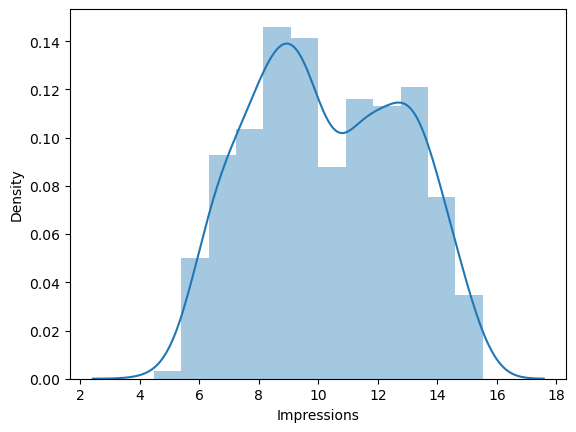

In [7]:
df_impr = conversion_df.groupby('fb_campaign_id', as_index=False)\
.sum()
sns.distplot(np.log(df_impr.Impressions))

**распределение не является нормальным, оно бимодальное**

посчитаем CTR(click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
CTR = clicks/impressions

In [8]:
conversion_df['ctr'] = conversion_df.Clicks/conversion_df.Impressions
conversion_df.query('ctr == ctr.max()')#инфо с наибольшим ctr

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id)

C:\Users\aizha\AppData\Local\Temp\ipykernel_18956\3126632095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(campaign916.ctr,bins=20,kde=False)


<Axes: xlabel='ctr'>

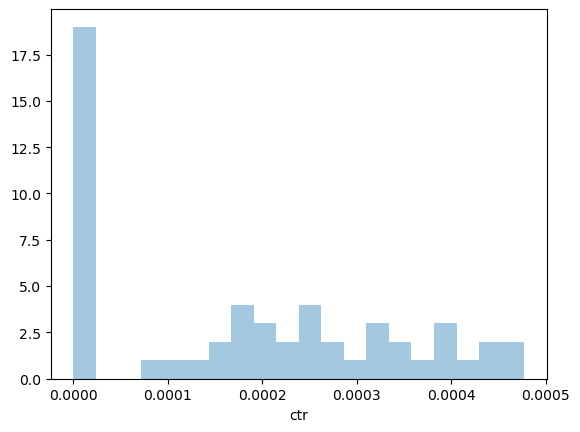

In [10]:
campaign916=conversion_df.query('xyz_campaign_id==916')
sns.distplot(campaign916.ctr,bins=20,kde=False)

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:  
Выведем описательные статистики для новой переменной, посмотрим на форму распределения. 

In [15]:
conversion_df['cpc'] = conversion_df.Spent/conversion_df.Clicks
ss.iqr(conversion_df.cpc,nan_policy='omit')

0.2543636990499998

In [16]:
conversion_df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

<Axes: xlabel='cpc', ylabel='Count'>

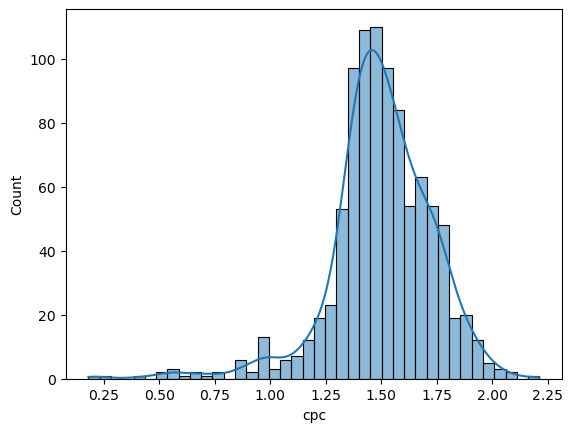

In [18]:
sns.histplot(conversion_df.cpc.dropna(),kde=True)

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.
Чтобы избежать появление ошибки, можно указать .dropna() при построении графика.

C:\Users\aizha\AppData\Local\Temp\ipykernel_18956\3183025521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(conversion_df.cpc.dropna())


<Axes: xlabel='cpc', ylabel='Density'>

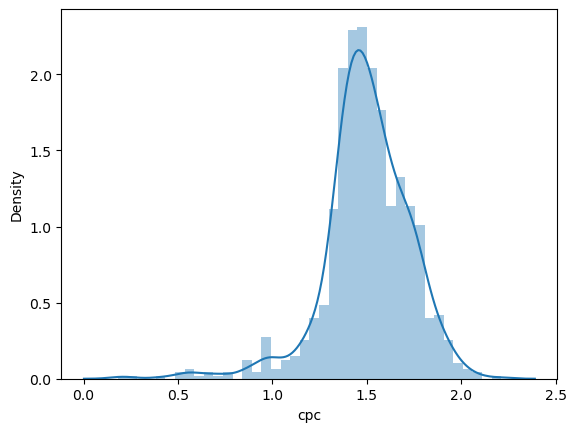

In [31]:
df_gender_cpc = conversion_df.groupby('gender')
sns.distplot(conversion_df.cpc.dropna())

Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

C:\Users\aizha\AppData\Local\Temp\ipykernel_18956\4216289368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(conversion_df[conversion_df['gender']=='M']['cpc'].dropna(),label='male')
C:\Users\aizha\AppData\Local\Temp\ipykernel_18956\4216289368.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

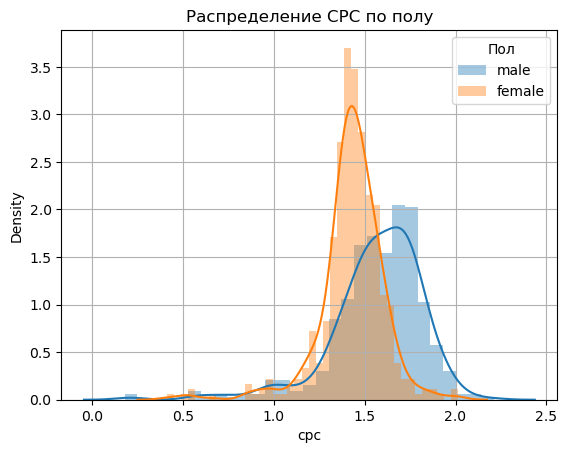

In [43]:
sns.distplot(conversion_df[conversion_df['gender']=='M']['cpc'].dropna(),label='male')
sns.distplot(conversion_df[conversion_df['gender']=='F']['cpc'].dropna(),label='female')
plt.title('Распределение CPC по полу')
plt.legend(title='Пол') 
plt.grid()


Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитаем конверсию из клика в покупку. Посчитаем конверсию для объявления 1121814 в процентах. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

In [32]:
conversion_df['cr']=conversion_df.Approved_Conversion/conversion_df.Clicks
conversion_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [36]:
conversion_df.query('ad_id==1121814').cr*100

860    3.087886
Name: cr, dtype: float64